In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

<H1> compute readings <H1>

In [2]:
!sed -i '' 's/,/./g' ../../Messungen/*
distances = range(10,81,5)
voltages = []

In [3]:
for i in distances:
    table = (np.genfromtxt("../../Messungen/"+str(i)+".csv", dtype=float,delimiter=';', encoding=None))
    for j in range(1000):
        table = np.delete(table, 0, 0)
    table = table[:, 1]
    voltages.append(np.mean(table))

Text(0.5, 0, 'Length in cm')

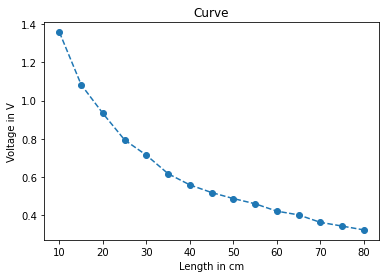

In [4]:
plt.plot(distances,voltages,'o--')
plt.title("Curve")
plt.ylabel("Voltage in V")
plt.xlabel("Length in cm")

<H1> take readings logarithmically <H1>

In [5]:
logVoltages = []
logDistances = []

In [6]:
for i in voltages:
    logVoltages.append(np.log(i))
for i in distances:
    logDistances.append(np.log(i))

Text(0.5, 1.0, 'Log curve')

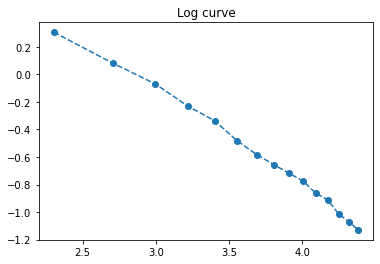

In [7]:
plt.plot(logDistances,logVoltages,'o--')
plt.title("Log curve")

In [8]:
meanVoltages = np.mean(logVoltages)
meanDistances = np.mean(logDistances)
numerator = 0
denominator = 0

In [9]:
for i in range(len(logVoltages)):
    numerator += (logVoltages[i] - meanVoltages) * (logDistances[i] - meanDistances)
    denominator += (logVoltages[i] - meanVoltages)**2
pitch = numerator/denominator
offset = meanDistances - pitch * meanVoltages

<H1> create a regression line <H1>

In [10]:
logRegressionVoltage = []
logRegressionDistance = []
for i in range(15):
    logRegressionVoltage.append(np.log(voltages[i]))
    logRegressionDistance.append(np.log(voltages[i]) * pitch + offset)

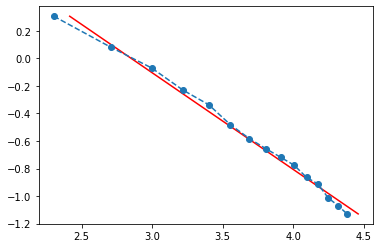

In [11]:
plt.plot(logRegressionDistance,logRegressionVoltage,'r')
plt.plot(logDistances,logVoltages,'o--')

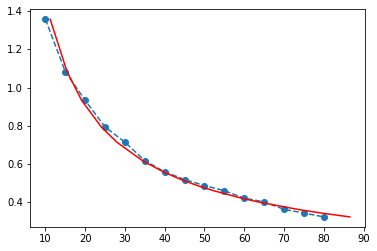

In [12]:
plt.plot(distances,voltages,'o--')
plt.plot(np.exp(logRegressionDistance),np.exp(logRegressionVoltage),'r')

<H1> determine measurement errors <H1>

In [13]:
deviation = np.std(voltages)
measurementError68 = deviation
measurementError95 = deviation * 1.97
measurementError99 = deviation * 2.6
print("measurement errrors (in Volt): \t 68.26%: " ,measurementError68, "\t 95%: ", measurementError95, "\t 99%: ", measurementError99)

measurement errrors (in Volt): 	 68.26%:  0.2909522864621708 	 95%:  0.5731760043304764 	 99%:  0.7564759448016442


<H1> calculate size of paper <H1>

In [15]:
paperLength = table = (np.genfromtxt("../../Messungen/paperWidth.csv", dtype=float,delimiter=';', encoding=None))
paperHeight = table = (np.genfromtxt("../../Messungen/paperHeight.csv", dtype=float,delimiter=';', encoding=None))
for j in range(1000):
    paperLength = np.delete(paperLength, 0, 0)
    paperHeight = np.delete(paperHeight, 0, 0)
paperHeight = paperHeight[:, 1]
paperLength = paperLength[:, 1]
height = np.exp(np.log(np.mean(paperHeight)) * pitch + offset)
length = np.exp(np.log(np.mean(paperLength)) * pitch + offset)
print("Height: ",height,"cm", "\t Length: ",length,"cm", "\t Area: ", height*length,"cm^2")

Height:  28.847930581652637 cm 	 Length:  20.040896642096772 cm 	 Area:  578.1383951252831 cm^2
